# Project: Wrangling and Analyze Data

## Table of Contents:
* [Data Gathering](#first-tile)
    * [WeRateDogs Twitter archive](#first1)
    * [Download the tweet image prediction](#second1)
    * [Query additional data via the Twitter API](#third1)
    
* [Assessing Data](#second-title)
    * [Quality issues](#first2)
    * [Tidiness issues](#second2)
    
* [Cleaning Data](#third-title)
    * [Quality issues](#first3)
        * [Issue 1](#issue1)
        * [Issue 2](#issue2)
        * [Issue 3](#issue3)
        * [Issue 4](#issue4)
        * [Issue 5](#issue5)
        * [Issue 6](#issue6)
        * [Issue 7](#issue7)
        * [Issue 8](#issue8)
    * [Tidiness issues](#second3)
        * [Issue 1](#issue11)
        * [Issue 2](#issue12)
        
* [Storing Data](#fourth-title)

* [Analyzing Data](#fifth-title)

* [Insights](#sixth-title)

* [Visualizations](#seventh-title)

## Data Gathering <a class="anchor" id="first-title"></a>

1.1 Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) <a class="anchor" id="first1"></a>

In [148]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from PIL import Image
from io import BytesIO

twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
twitter_archive_enhanced[twitter_archive_enhanced.name == 'quite'].text.value_counts()

RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…                          1
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9                  1
Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x    1
This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t                          1
Name: text, dtype: int64

In [4]:
twitter_archive_enhanced[twitter_archive_enhanced.text.str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [5]:
twitter_archive_enhanced.duplicated(subset= 'expanded_urls').sum()

137

1.2 Use the Requests library to download the tweet image prediction (image_predictions.tsv) <a class="anchor" id="second1"></a>

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

tweet_image_prediction = requests.get(url)

folder = 'image-predictions.tsv'

# Opens a file and writes the contents from the requested URL.
with open(folder, 'wb') as file:
    file.write(tweet_image_prediction.content)
    
twitter_image_prediction = pd.read_csv('image-predictions.tsv', sep= '\t')
twitter_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
twitter_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
twitter_image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [9]:
twitter_image_prediction.duplicated().sum()

0

1.3 Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) <a class="anchor" id="third1"></a>

In [38]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit= True)

tweetIDErrors = {} # Creates a dictionary of all the twitter ids whose status will not be found.
with open('tweet_json.txt', 'w') as file:
    for tweet in list(twitter_archive_enhanced.tweet_id): # Iterates through all the tweet_ids
        try:
            tweet = api.get_status(tweet)._json # Gets all the json data from all the tweet_ids
            """The dumps() function of the json module dumps a dictionary
            into JSON contents, and returns a JSON string."""
            data = json.dumps(tweet)
            print(data, file= file, end= '\n')                
               
        except Exception as e:
            # Catches all the exceptions and assigns them to the string below.
            tweetIDErrors[tweet] = 'No status found with that ID.'

Rate limit reached. Sleeping for: 127


In [39]:
df = []

# Reading the file line by line
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)    
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df.append({'tweet_id' : tweet_id,
                   'data' : data,
                   'retweet_count' : retweet_count,
                   'favorite_count' : favorite_count})
        
twitter_counts_API = pd.DataFrame(df) # Loads the list df into a DataFrame
twitter_counts_API

,tweet_id,data,retweet_count,favorite_count
0,892420643555336193,{'created_at': 'Tue Aug 01 16:23:56 +0000 2017...,7010,33829
1,892177421306343426,{'created_at': 'Tue Aug 01 00:17:27 +0000 2017...,5302,29343
2,891815181378084864,{'created_at': 'Mon Jul 31 00:18:03 +0000 2017...,3482,22066
3,891689557279858688,{'created_at': 'Sun Jul 30 15:58:51 +0000 2017...,7219,36919
4,891327558926688256,{'created_at': 'Sat Jul 29 16:00:24 +0000 2017...,7767,35326
...,...,...,...,...
2322,666049248165822465,{'created_at': 'Mon Nov 16 00:24:50 +0000 2015...,37,89
2323,666044226329800704,{'created_at': 'Mon Nov 16 00:04:52 +0000 2015...,115,247
2324,666033412701032449,{'created_at': 'Sun Nov 15 23:21:54 +0000 2015...,36,100
2325,666029285002620928,{'created_at': 'Sun Nov 15 23:05:30 +0000 2015...,39,112


In [40]:
# Return all the twitter ids whose status were not found.
tweetIDErrors

{888202515573088257: 'No status found with that ID.',
 873697596434513921: 'No status found with that ID.',
 872668790621863937: 'No status found with that ID.',
 872261713294495745: 'No status found with that ID.',
 869988702071779329: 'No status found with that ID.',
 866816280283807744: 'No status found with that ID.',
 861769973181624320: 'No status found with that ID.',
 856602993587888130: 'No status found with that ID.',
 856330835276025856: 'No status found with that ID.',
 851953902622658560: 'No status found with that ID.',
 851861385021730816: 'No status found with that ID.',
 845459076796616705: 'No status found with that ID.',
 844704788403113984: 'No status found with that ID.',
 842892208864923648: 'No status found with that ID.',
 837366284874571778: 'No status found with that ID.',
 837012587749474308: 'No status found with that ID.',
 829374341691346946: 'No status found with that ID.',
 827228250799742977: 'No status found with that ID.',
 812747805718642688: 'No sta

In [41]:
twitter_counts_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   data            2327 non-null   object
 2   retweet_count   2327 non-null   int64 
 3   favorite_count  2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


## Assessing Data <a class="anchor" id="second-title"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues <a class="anchor" id="first2"></a>
1. Some columns in the **twitter-archives-enhanced.csv** file have missing data.

2. Rows in the text column on the **twitter-archives-enhanced.csv** have links which wouldn't look great on a word cloud.

3. Source column in **twitter-archives-enhanced.csv** have irrelevant information for our a dataset.

4. Some dog breeds are indicated as false in the **image-predictions.tsv**.

5. The column name in **twitter-archives-enhanced.csv** has some names as quite. These are not dogs.

6. Some ratings are retweets in **twitter-archives-enhanced.csv** dataset.

7. Some expanded urls have more than one link in **twitter-archives-enhanced.csv**.

8. Some expanded_urls in **twitter-archives-enhanced.csv** have been duplicated and those that appear first are incorrect. Others are NULL.

### Tidiness issues <a class="anchor" id="second2"></a>
1. The dog stages should be under one column.

2. Classification of dog breeds should be under one column.

## Cleaning Data <a class="anchor" id="third-title"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [73]:
# Make copies of original pieces of data
twitter_archive = twitter_archive_enhanced.copy()

twitter_image = twitter_image_prediction.copy()

twitter_counts = twitter_counts_API.copy()

## Quality issues <a class="anchor" id="first3"></a>

### Issue #1: <a class="anchor" id="issue1"></a>

#### Define:

- Cleaning the **twitter-archive-enhanced.csv** columns with a lot of missing data.

#### Code

In [74]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp']

twitter_archive.drop(cols, axis= 1, inplace= True)

#### Test

In [75]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #2: <a class="anchor" id="issue2"></a>

#### Define
- Extract only the source of the tweet from `twitter-archives-enhanced.csv`.

#### Code

In [76]:
twitter_archive['source'] = twitter_archive.source.str.extract(r'^(?:<a href="https?://.+">)(.+)(?:</a>)$', expand= True)

#### Test

In [77]:
twitter_archive.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #3: <a class="anchor" id="issue3"></a>

#### Define

- Removing the links in the text column on the `twitter-archives-enhanced.csv`.

#### Code

In [78]:
twitter_archive['text'] = twitter_archive.text.str.extract(r'^(.+)(?:https?://t.co/[\w]+)$', expand= True)

#### Test

In [79]:
twitter_archive.text.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 ",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 ',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af ',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of ',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet '],
      dtype=object)

### Issue #4: <a class="anchor" id="issue4"></a>

#### Define

- Remove the rows where column name in `twitter-archives-enhanced.csv` has some names as quite. These are not dogs

#### Code

In [80]:
twitter_archive = twitter_archive[twitter_archive['name'] != 'quite']

#### Test

In [81]:
twitter_archive.query('name == "quite"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5: <a class="anchor" id="issue5"></a>

#### Define

- Remove the ratings which are retweets from `twitter-archive-enhanced.csv`.

#### Code

In [82]:
twitter_archive['text_modified'] = twitter_archive.text.str.extract(r'^(RT @)(?:.+)$', expand= True)

twitter_archive = twitter_archive[twitter_archive['text_modified'] != 'RT @']

twitter_archive.drop('text_modified', axis= 1, inplace= True)

#### Test

In [83]:
twitter_archive.text.str.contains('RT @').value_counts()

False    2039
Name: text, dtype: int64

### Issue #6: <a class="anchor" id="issue6"></a>

#### Define

- Remove the dog breeds that are indicated as **False** in the `image-predictions.tsv`.

#### Code

In [84]:
a = (twitter_image['p1_dog'] == True) & (twitter_image['p2_dog'] == True) & (twitter_image['p3_dog'] == True)
b = (twitter_image['p1_dog'] == True) & (twitter_image['p2_dog'] == True) & (twitter_image['p3_dog'] == False)
c = (twitter_image['p1_dog'] == True) & (twitter_image['p2_dog'] == False) & (twitter_image['p3_dog'] == True)
d = (twitter_image['p1_dog'] == True) & (twitter_image['p2_dog'] == False) & (twitter_image['p3_dog'] == False)
e = (twitter_image['p1_dog'] == False) & (twitter_image['p2_dog'] == True) & (twitter_image['p3_dog'] == True)
f = (twitter_image['p1_dog'] == False) & (twitter_image['p2_dog'] == True) & (twitter_image['p3_dog'] == False)
g = (twitter_image['p1_dog'] == False) & (twitter_image['p2_dog'] == False) & (twitter_image['p3_dog'] == True)
h = (twitter_image['p1_dog'] == False) & (twitter_image['p2_dog'] == False) & (twitter_image['p3_dog'] == False)

a = twitter_image[a]
b = twitter_image[b]
c = twitter_image[c]
d = twitter_image[d]
e = twitter_image[e]
f = twitter_image[f]
g = twitter_image[g]
h = twitter_image[h]

a.iloc[:, 6:] = np.nan
b.iloc[:, 6:] = np.nan
c.iloc[:, 6:] = np.nan
d.iloc[:, 6:] = np.nan
e.loc[:, ['p1', 'p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog']] = np.nan
f.loc[:, ['p1', 'p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog']] = np.nan
g.loc[:, ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog']] = np.nan
h.iloc[:, 3:] = np.nan

twitter_image = pd.concat([a, b, c, d, e, f, g, h], ignore_index= True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### Test

In [85]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   float64
 6   p2        155 non-null    object 
 7   p2_conf   155 non-null    float64
 8   p2_dog    155 non-null    float64
 9   p3        64 non-null     object 
 10  p3_conf   64 non-null     float64
 11  p3_dog    64 non-null     float64
dtypes: float64(6), int64(2), object(4)
memory usage: 194.7+ KB


### Issue #7: <a class="anchor" id="issue7"></a>

#### Define

- Remove more than one expanded urls

#### Code

In [86]:
twitter_archive['expanded_urls'] = twitter_archive.expanded_urls.str.extract(r'^(?:.)?(https://twitter.com/dog_rates/status/[\d]+/(photo|video)/1)(?:.*)$', expand= True)[0]

#### Test

In [87]:
twitter_archive.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2258, dtype: object

### Issue #8: <a class="anchor" id="issue8"></a>

#### Define

- Assign the duplicated and NaN expanded urls to their correct status ids `twitter-archive-enhanced.csv`.

#### Code

In [88]:
twitter_archive.loc[:, 'expanded_urls'] = np.nan
twitter_archive.expanded_urls.fillna('https://twitter.com/dog_rates/status/0/photo/1', inplace= True)
twitter_archive['expanded_urls'] = twitter_archive.expanded_urls.str.split('0')
first, last = twitter_archive.expanded_urls.str
twitter_archive['expanded_urls'] = first + twitter_archive.tweet_id.astype(str) + last

C:\Users\dell\AppData\Local\Temp/ipykernel_6736/1527701608.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  first, last = twitter_archive.expanded_urls.str


#### Test

In [89]:
twitter_archive.expanded_urls.duplicated().sum(), twitter_archive.expanded_urls.isna().sum()

(0, 0)

In [90]:
twitter_archive.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
102,872620804844003328,2017-06-08 01:06:27 +0000,Twitter for iPhone,This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,None,None,None,None
1338,705066031337840642,2016-03-02 16:23:36 +0000,Twitter for iPhone,This is Reese. He's a Chilean Sohcahtoa. Loves...,https://twitter.com/dog_rates/status/705066031...,12,10,Reese,None,None,None,None
1091,737445876994609152,2016-05-31 00:49:32 +0000,Twitter for iPhone,Just wanted to share this super rare Rainbow F...,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None
2038,671550332464455680,2015-12-01 04:44:10 +0000,Twitter for iPhone,NaN,https://twitter.com/dog_rates/status/671550332...,1,10,None,None,None,None,None
320,834458053273591808,2017-02-22 17:41:18 +0000,Twitter for iPhone,Meet Chester (bottom) &amp; Harold (top). They...,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
1190,718234618122661888,2016-04-08 00:30:51 +0000,Twitter for iPhone,This is Suki. She was born with a blurry tail ...,https://twitter.com/dog_rates/status/718234618...,11,10,Suki,None,None,None,None
1827,676430933382295552,2015-12-14 15:57:56 +0000,Twitter for iPhone,Meet Duke. He's an Urban Parmesan. They know h...,https://twitter.com/dog_rates/status/676430933...,10,10,Duke,None,None,None,None
2162,669393256313184256,2015-11-25 05:52:43 +0000,Twitter for iPhone,Meet Ronduh. She's a Finnish Checkered Blitzkr...,https://twitter.com/dog_rates/status/669393256...,10,10,Ronduh,None,None,None,None
133,866720684873056260,2017-05-22 18:21:28 +0000,Twitter for iPhone,He was providing for his family 13/10 how dare...,https://twitter.com/dog_rates/status/866720684...,13,10,None,None,None,None,None
1636,684200372118904832,2016-01-05 02:30:55 +0000,Twitter for iPhone,Gang of fearless hoofed puppers here. Straight...,https://twitter.com/dog_rates/status/684200372...,6,10,None,None,None,None,None


## Tidiness issues <a class="anchor" id="second3"></a>

### Issue #1: <a class="anchor" id="issue11"></a>

#### Define

- Classifying dog breeds in `image-prediction.tsv` under one column.

#### Code

In [91]:
twitter_image = pd.melt(twitter_image, id_vars= ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf'],
                        value_vars= ['p1', 'p2', 'p3'], value_name= 'breed')

twitter_image = pd.melt(twitter_image, id_vars= ['tweet_id', 'jpg_url', 'img_num', 'breed'],
                        value_vars= ['p1_conf', 'p2_conf', 'p3_conf'], value_name= 'prediction_conf')

twitter_image.drop('variable', axis= 1, inplace= True)

twitter_image.drop_duplicates(subset= 'tweet_id', inplace= True, ignore_index= True)

#### Test

In [92]:
twitter_image

,tweet_id,jpg_url,img_num,breed,prediction_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
...,...,...,...,...,...
2070,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,NaN,NaN
2071,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,NaN,NaN
2072,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,NaN,NaN
2073,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,NaN,NaN


### Issue #2: <a class="anchor" id="issue12"></a>

#### Define

- Classifying the dog stages under one column.

#### Code

In [93]:
twitter_archive = twitter_archive.replace('None', np.nan)

cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive = pd.melt(twitter_archive, id_vars= ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                                                     'rating_numerator', 'rating_denominator', 'name'], value_vars= cols,
                         value_name= 'dog_stages')

twitter_archive.drop('variable', axis= 1, inplace= True)

a = twitter_archive[twitter_archive['dog_stages'] == 'doggo']
b = twitter_archive[twitter_archive['dog_stages'] == 'floofer']
c = twitter_archive[twitter_archive['dog_stages'] == 'pupper']
d = twitter_archive[twitter_archive['dog_stages'] == 'puppo']
e = twitter_archive.dog_stages.isna() == True
e = twitter_archive[e]
e.drop_duplicates(subset= 'tweet_id', inplace= True, ignore_index= True)

twitter_archive = pd.concat([a, b, c, d, e], ignore_index= True)

twitter_archive.drop_duplicates(subset= 'tweet_id', inplace= True, ignore_index= True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


#### Test

In [94]:
twitter_archive.tweet_id.duplicated().sum(), twitter_archive.dog_stages.unique()

(0, array(['doggo', 'floofer', 'pupper', 'puppo', nan], dtype=object))

In [95]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2258 non-null   int64 
 1   timestamp           2258 non-null   object
 2   source              2258 non-null   object
 3   text                2039 non-null   object
 4   expanded_urls       2258 non-null   object
 5   rating_numerator    2258 non-null   int64 
 6   rating_denominator  2258 non-null   int64 
 7   name                1552 non-null   object
 8   dog_stages          362 non-null    object
dtypes: int64(3), object(6)
memory usage: 158.9+ KB


In [97]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   int64  
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   breed            1532 non-null   object 
 4   prediction_conf  1532 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


In [98]:
twitter_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   data            2327 non-null   object
 2   retweet_count   2327 non-null   int64 
 3   favorite_count  2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


Creating a master dataset called df.

In [99]:
df = twitter_archive.merge(twitter_image, on= 'tweet_id', how= 'left').merge(twitter_counts, on= 'tweet_id', how= 'left')

In [100]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,breed,prediction_conf,data,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,6101.0,27971.0
1,884162670584377345,2017-07-09 21:29:42 +0000,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,German_shepherd,0.707046,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,2506.0,17948.0
2,872967104147763200,2017-06-09 00:02:31 +0000,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2.0,Labrador_retriever,0.476913,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,4564.0,24092.0
3,871515927908634625,2017-06-04 23:56:03 +0000,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,komondor,0.974781,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,2942.0,17897.0
4,871102520638267392,2017-06-03 20:33:19 +0000,Twitter for iPhone,Never doubt a doggo 14/10,https://twitter.com/dog_rates/status/871102520...,14,10,NaN,doggo,NaN,NaN,NaN,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,4685.0,18560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,{'created_at': 'Mon Nov 16 00:24:50 +0000 2015...,37.0,89.0
2254,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,{'created_at': 'Mon Nov 16 00:04:52 +0000 2015...,115.0,247.0
2255,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,{'created_at': 'Sun Nov 15 23:21:54 +0000 2015...,36.0,100.0
2256,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,{'created_at': 'Sun Nov 15 23:05:30 +0000 2015...,39.0,112.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2258 non-null   int64  
 1   timestamp           2258 non-null   object 
 2   source              2258 non-null   object 
 3   text                2039 non-null   object 
 4   expanded_urls       2258 non-null   object 
 5   rating_numerator    2258 non-null   int64  
 6   rating_denominator  2258 non-null   int64  
 7   name                1552 non-null   object 
 8   dog_stages          362 non-null    object 
 9   jpg_url             1993 non-null   object 
 10  img_num             1993 non-null   float64
 11  breed               1478 non-null   object 
 12  prediction_conf     1478 non-null   float64
 13  data                2240 non-null   object 
 14  retweet_count       2240 non-null   float64
 15  favorite_count      2240 non-null   float64
dtypes: flo

## Storing Data <a class="anchor" id="fourth-title"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [238]:
df.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data <a class="anchor" id="fifth-title"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [1]:
# Getting the tweet with the highest number of rating.

df[df.rating_numerator == df.rating_numerator.max()][['tweet_id', 'rating_numerator']]

NameError: name 'df' is not defined

In [175]:
df[df.prediction_conf == df.prediction_conf.max()][['tweet_id', 'name', 'prediction_conf']]

,tweet_id,name,prediction_conf
2109,668636665813057536,an,0.999956


In [130]:
df.rating_numerator.mean()

13.182905225863596

In [122]:
df.retweet_count.describe()

count     2240.000000
mean      2318.068750
std       4013.194789
min          1.000000
25%        489.000000
50%       1105.500000
75%       2650.250000
max      70792.000000
Name: retweet_count, dtype: float64

In [123]:
df.loc[df.retweet_count == df.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,breed,prediction_conf,data,retweet_count,favorite_count
79,744234799360020481,2016-06-18 18:26:18 +0000,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333,{'created_at': 'Sat Jun 18 18:26:18 +0000 2016...,70792.0,144966.0


In [241]:
df.isna().sum()

tweet_id                 0
timestamp                0
source                   0
text                   219
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                   706
dog_stages            1896
jpg_url                265
img_num                265
breed                  780
prediction_conf        780
data                    18
retweet_count           18
favorite_count          18
dtype: int64

In [242]:
df.timestamp.min(), df.timestamp.max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

### Insights: <a class="anchor" id="sixth-title"></a>
1. Most of the tweets were sent from an iPhone.

2. Most of the breeds were predicted using the first image.

3. Most of the dogs were puppers.

### Visualizations <a class="anchor" id="seventh-title"></a>

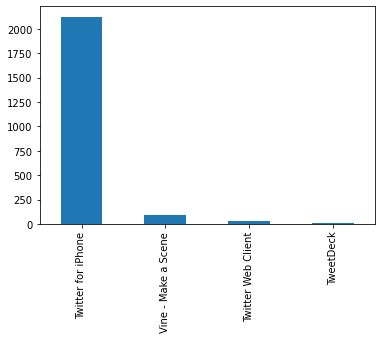

In [120]:
df.source.value_counts().plot(kind= 'bar');

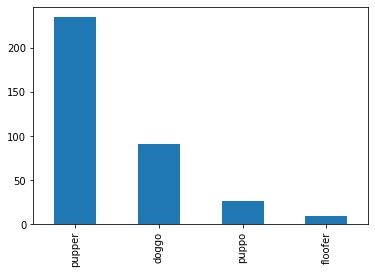

In [121]:
df.dog_stages.value_counts().plot(kind= 'bar');

<AxesSubplot:xlabel='dog_stages'>

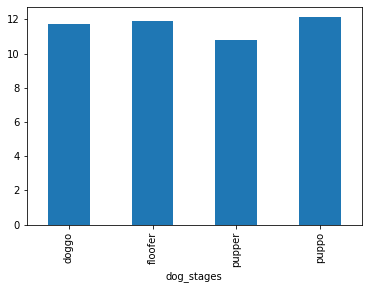

In [134]:
df.groupby('dog_stages').rating_numerator.mean().plot(kind= 'bar');

<AxesSubplot:xlabel='dog_stages'>

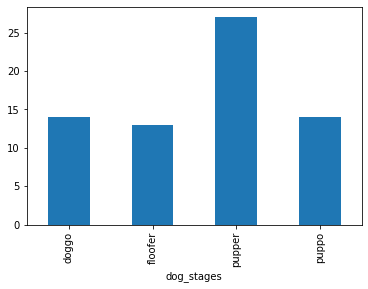

In [165]:
df.groupby('dog_stages').rating_numerator.max().plot(kind= 'bar');

<AxesSubplot:ylabel='Frequency'>

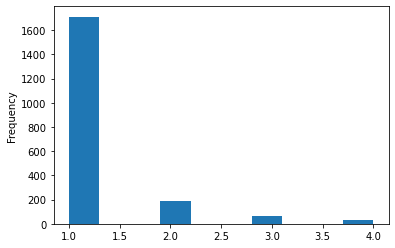

In [237]:
df.img_num.plot(kind= 'hist');

<AxesSubplot:ylabel='breed'>

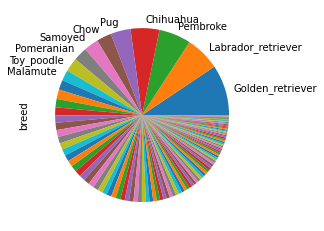

In [236]:
labels = df.breed.value_counts()
labels = np.full(len(labels), '', dtype= object)
labels[:10] = ['Golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'Pug', 'Chow', 'Samoyed',
                  'Pomeranian', 'Toy_poodle', 'Malamute']
df.breed.value_counts().plot(kind= 'pie', labels= labels);

<AxesSubplot:ylabel='dog_stages'>

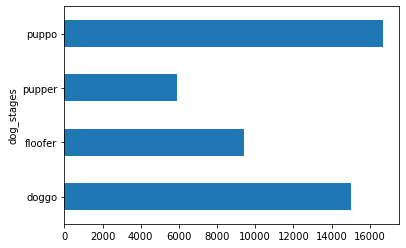

In [229]:
df.groupby('dog_stages').favorite_count.mean().plot(kind= 'barh');

<AxesSubplot:xlabel='dog_stages'>

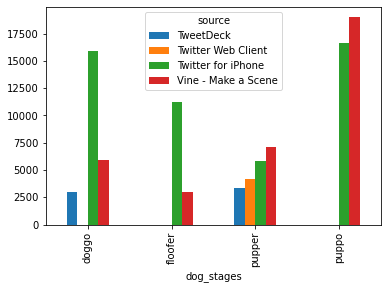

In [235]:
df.groupby(['dog_stages', 'source']).favorite_count.mean().unstack().plot(kind= 'bar');